# Deep Dive 1 in GBSV (Grundlagen der Bild- und Signalverarbeitung)

This is the first of two deep dives in this module. 

In this deep dive you will learn about signal data (1D) and image data (2D) on audible and visual examples.
You will learn how to load and record sounds and how to ensure that you loaded the right images (and not blue tomatoes 😉).
We will manipulate signals and images and produce through this new art objects in this first deep dive!

For this deep dive we have prepared two Jupyter Notebooks where the following topics are contained: 

**gbsv_deep-dive1_part1.ipynb**
* Python Libraries for signal- and imageprocessing
* Characteristics of signals and images
* Basic transformations of signal and image attributes

**gbsv_deep-dive1_part2.ipynb**
* Concept of convolution/folding
* Spatial domain filtering
* Frequency domain filtering
* Discrete Fourier transformation on signals and images

# Deep Dive 1 in GBSV - Part 1

![blue_tomato](./Images/bluetomato.png)
![signal_sample](./Images/signal_sample.png)

# Imports

In [52]:
import cv2 as cv
import librosa
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd

from ipywidgets import interact, widgets
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider, Button, TextBox
from scipy.io.wavfile import write

# Data Loading and Visualizing

There exist many different helpful libraries in the world of signal and image processing for **loading and handling audio and video data**. <br>
In this deep dive we use selected libraries that will help us with these tasks:
* [librosa](https://iq.opengenus.org/introduction-to-librosa/) for audio data
* [OpenCV](https://learnopencv.com/getting-started-with-opencv/) for image loading and processing
* [NumPy](https://numpy.org/) for handling audio and image data
* [scikit-image](https://scikit-image.org/) for calculating metrics

For the **visualization** we will use [matplotlib](https://matplotlib.org/).

Other common libraries that are available but not used in this deep dive are [pillow](https://python-pillow.org/) or [SciPy](https://scipy.org/)

We will start with recording audio samples, looking at the data that is recorded and the patterns thereof.<br>
After the audio processing we will change the domain and focus on 2D image data.

# Audio Processing with librosa
First, we record short audio sequence ourselves at a sampling rate of 44'100 Hz.

**sampling_rate** - (Also called *sampling frequency* or in German *Abtastrate*): This term defines how many sound samples are recorded per second and is measured in hertz (Hz).
The typical sampling rate of [44'100 Hz (44.1kHz)](https://en.wikipedia.org/wiki/44,100_Hz#Why_44.1_kHz.3F) originated in the late 1970s for recording digital audio on video cassettes and later CDs.

#### <font color='blue'>Exercise: </font>
Record a first audio sequence of a few seconds yourself, save it to disk and play it.

In [53]:
# Sampling frequency
sampling_rate = 44100

# Recording duration in seconds
duration = 5

# Start recorder with the given values of 
# duration and sampling frequency
print("Starting recording...")
recording = sd.rec(int(duration * sampling_rate), 
                   samplerate=sampling_rate, channels=2)

# Record audio for the given number of seconds
sd.wait()
print("Recording finished.")

audio_filename = "Sounds/recording0.wav"
# Save audio
write(audio_filename, sampling_rate, recording)

Starting recording...
Recording finished.


In [54]:
# Play recorded audio
sd.play(recording, sampling_rate)

In [55]:
# Load audio with librosa
audio, _ = librosa.load(audio_filename, sr=sampling_rate)
print(f"{audio=}")
print(f"{audio.dtype=}")
print(f"{audio.shape=}")
print(f"{np.max(audio)=}")
print(f"{np.min(audio)=}")

audio=array([ 0.0000000e+00, -1.5258789e-05,  0.0000000e+00, ...,
        3.8757324e-02,  3.8116455e-02,  3.8131714e-02], dtype=float32)
audio.dtype=dtype('float32')
audio.shape=(220500,)
np.max(audio)=0.27838135
np.min(audio)=-0.25346375


In [56]:
sd.play(audio, 10000)

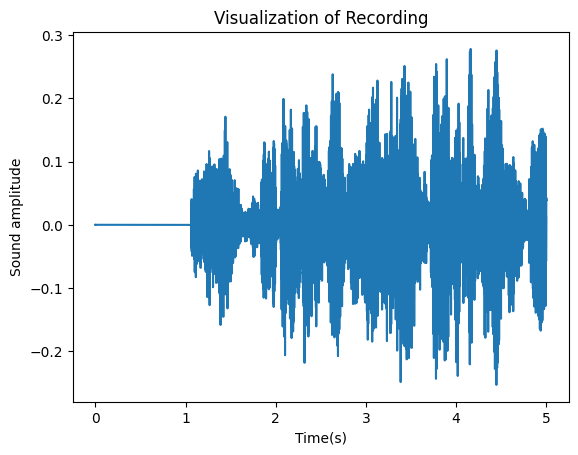

In [57]:
time = np.arange(0, len(audio))/sampling_rate
fig, ax = plt.subplots()
ax.set_title("Visualization of Recording")
ax.plot(time, audio)
ax.set(xlabel='Time(s)', ylabel='Sound amplitude')
plt.show()

#### <font color='blue'>Exercise: </font> 
Try to record different sounds.
* How does a typical soundwave look like? What are the maximal and minimal values that can be achieved?   

A typical soundwave looks live a combining of different sinuves waves. The minus and maximum values that can be achieved are -1 and 1.

* What happens when you change the ```sampling_rate```?

A lower sampling rate means that the sound is lower and duller. A higher sampling rate means that the sound is higher and sharper.

* What happens when you use two different values of ```sampling_rate``` for the recording of the audio and the playback?

## Construction of a Tone
To understand the basics of sound it is crucial to understand some general principels of signals.
Sound is composed of many different sine waves. By combining the right sine waves in the right order an audio as recorded above arises.
But to understand this we have to go one step back and first look at one single sine wave!

A sine wave has the following properties:

**Definition:** $y = amplitude * sin(B * x) = amplitude * sin(2*\pi * frequency * x)$

**Period:** Defines the distance between two peaks $\frac{2*\pi}{B}$

**Amplitude:** Defines the height of the function from the center line

**Phase Shift:** There are two different shifts available: up/down and left/right. By shifting the signal is moved along the x-axis.

**Frequency:** Defines how many periods are in one unit of time (for example in 1 second) $1/Period$

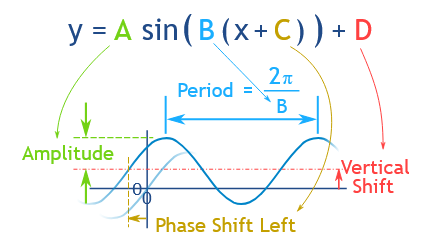

A detailed explanation with good graphics is given [here](https://www.mathsisfun.com/algebra/amplitude-period-frequency-phase-shift.html) 

In the following demo you can try it out the two parameters ```Amplitude``` and ```Frequency```

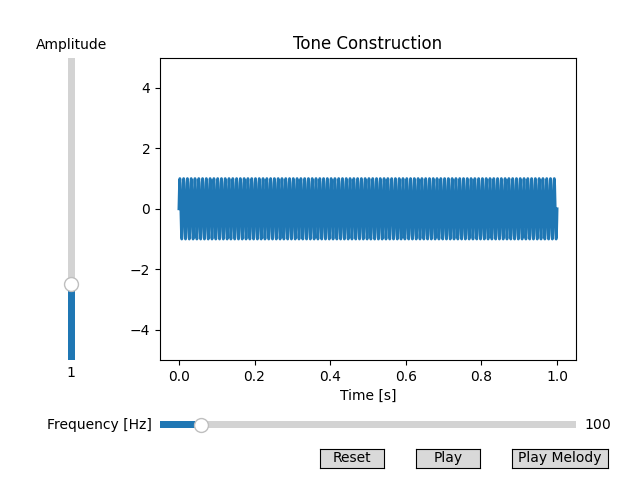

In [58]:
# Adapted from https://matplotlib.org/stable/gallery/widgets/slider_demo.html
# The parametrized function to be plotted
%matplotlib widget
def sine_wave(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

sampling_rate = 44100

t = np.linspace(0, 1, sampling_rate)

# Define initial parameters
init_amplitude = 1
init_frequency = 100

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, sine_wave(t, init_amplitude, init_frequency), lw=2)
ax.set_title("Tone Construction")
ax.set_ylim(-5,5)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=1,
    valmax=1000,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=4,
    valinit=init_amplitude,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(sine_wave(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.5, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')
resetax_play = fig.add_axes([0.65, 0.025, 0.1, 0.04])
button_play = Button(resetax_play, 'Play', hovercolor='0.975')
resetax_play = fig.add_axes([0.8, 0.025, 0.15, 0.04])
button_play_melody = Button(resetax_play, 'Play Melody', hovercolor='0.975')

def reset(event):
    freq_slider.reset()
    amp_slider.reset()

def play(event, length=2):
    t2 = np.linspace(start=0, stop=length, num=sampling_rate*length)
    wave = sine_wave(t2, amp_slider.val, freq_slider.val)
    sd.play(wave, sampling_rate)

def play_melody(event):
    frequencies = [392, 440, 494, 523, 587, 587]
    for f in frequencies:
        freq_slider.set_val(f)
        update(f)
        play(event, length=1)
        time.sleep(1)
        
        
button.on_clicked(reset)
button_play.on_clicked(play)
button_play_melody.on_clicked(play_melody)
plt.show()

#### <font color='blue'>Exercise:</font>
What is the pattern of this curve? How is it influenced by frequency and amplitude?

Je hoeher die Amplitude desto groesser der Wertebereich der Schwingung negativ und positiv. Jje tiefer die Frequenc, desto weniger Schwingungen. Je heoher desto mehr in kurzerer Zeit.

#### <font color='blue'>Exercise:</font> 
What differences are audible when we change frequency and amplitude?

Je hoeher die Frequenz desto hoeher der Ton, Je tiefer die Frequenz desto niedriger der Ton. 
Je hoeher die Amplitude desto lauter der Ton, je tiefer desto leiser. 

#### <font color='blue'>Exercise:</font>
Is the sound always hearable? When is the sound hearable and when not?

Nein der Sound ist nicht immer hoerbar fuer den Menschen. 

#### <font color='blue'>Exercise:</font>
Compose your own melody. 😊 A sample melody is given when pressing the ```Play Melodie``` button.

## Nyquist-Shannon Theorem

The Nyquist-Shannon theorem is an important theorem for signals. When remembering that the ```sampling_rate``` defines the amount of samples that are measured per second we can see that the real signal is not the same signal as the digitized one. The digitized signal is a discretized version of the analog signal of the world. 

The theorem says the following:

- **If a function x(t) contains no frequencies higher than B hertz, then it can be completely determined from its ordinates at a sequence of points spaced less than $\frac{1}{2B}$ seconds apart.**

This theorem can be expressed like this: $f_{SAMPLE} > 2f_{SIGNAL}$ to be able to perfectly reconstruct the signal without loosing information. In the scope of sinus waves that means that at least two sample points must be on each sinus cycle.

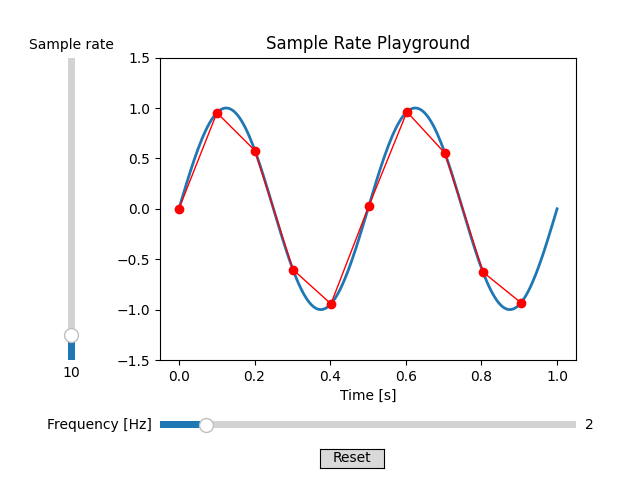

In [59]:
%matplotlib widget
sr = 200
t = np.linspace(0, 1, sr)
init_sample_frequency = 10
init_frequency = 2

# Create the figure and the line that we will manipulate
sine_w = sine_wave(t, 1, frequency=init_frequency)
fig, ax = plt.subplots()
line, = ax.plot(t, sine_w, lw=2)
points, = ax.plot(t[::int(sr/init_sample_frequency)], sine_w[::int(sr/init_sample_frequency)],  'ro-', lw=1)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel('Time [s]')
ax.set_title("Sample Rate Playground")

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)


# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=1,
    valmax=10,
    valinit=init_frequency,
    valstep=1.0
)

# Make a vertically oriented slider to control the sample_rate
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
sample_rate_slider = Slider(
    ax=axamp,
    label="Sample rate",
    valmin=2,
    valmax=100,
    valinit=init_sample_frequency,
    orientation="vertical",
    valstep=1.0
)


# The function to be called anytime a slider's value changes
def update(val):
    sine_w = sine_wave(t, 1, frequency=freq_slider.val)
    line.set_ydata(sine_wave(t, 1, frequency=freq_slider.val))
    points.set_xdata(t[::int((sr-1)/(sample_rate_slider.val-1))])
    points.set_ydata(sine_w[::int((sr-1)/(sample_rate_slider.val-1))])
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
sample_rate_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.5, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    sample_rate_slider.reset()
    freq_slider.reset()

button.on_clicked(reset)

plt.show()


#### <font color='blue'>Exercise:</font>
* Try a different amount ```samples``` to describe the sine wave. 

je hoeher die samplerate desto mehr punkte habe ich und desto besser gkann ich die Sinus Kurve darstellen

* With which amount of ```samples``` is the sine wave describable?

Wenn ich eine Frequncz von 10 Habe benoetige ich mindestens 2x mehr als 10. Also sprich brauche ich mindestens 20 bzw 21 um die Sinus Kurve darzustellen.


* Does the frequency change the amount of ```samples``` needed in the previous question?


## Generate More Than Just One Tone
Usually multiple tones are combined to generate interesting sounds. For this we are going to combine sine waves by adding them together.

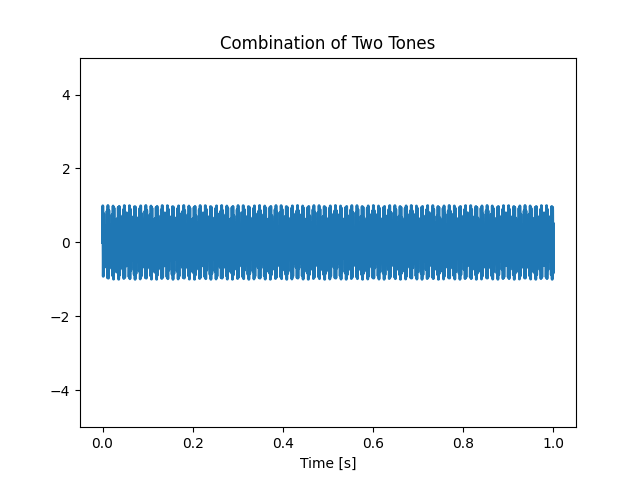

In [60]:
sampling_rate = 44100
t = np.linspace(0, 1, sampling_rate) 
a = sine_wave(t, amplitude=0.5, frequency=440)
c = sine_wave(t, amplitude=0.5, frequency=523.25)
a_c_wave = a + c

fig, ax = plt.subplots()
line, = ax.plot(t, a_c_wave, lw=2)
ax.set_ylim(-5,5)
ax.set_xlabel('Time [s]')
ax.set_title("Combination of Two Tones")

sd.play(a_c_wave, sampling_rate)

In the previous cell we saw how to combine two tones. 

In the following cell you can try to combine multiple tones on your own. 
By clicking the corresponding button the tone is added to the graph and by again pressing the button the tone is removed.

#### <font color='blue'>Exercise:</font>
* How many tones can be combined?
* How does the curve change its shape by adding different waves?

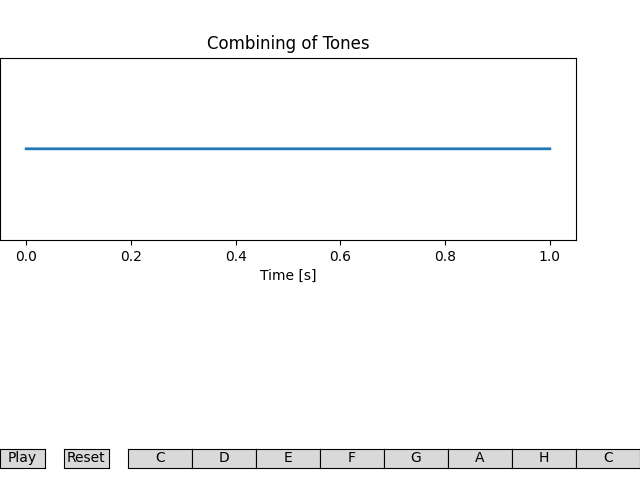

In [61]:
%matplotlib widget

sampling_rate = 44100
duration = 1.0

t = np.linspace(0, duration, int(sampling_rate*duration))

# Define initial parameters
default_wave = sine_wave(t, amplitude=0.5, frequency=0)
waves = []
tones_set = []
tones = { 'c': 261.63, 'd': 293.66, 'e': 329.63, 'f': 349.23, 'g': 392.00, 'a': 440, 'h': 493.88, 'c_2': 523.25 }

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, default_wave, lw=2)
ax.set_ylim(-5,5)
ax.set_xlabel('Time [s]')
ax.set_title("Combining of Tones")

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0, bottom=0.5)

# The function to be called
def update(event):
    wave = default_wave.copy()
    for w in waves:
        wave += w[1]
    line.set_ydata(wave)
    fig.canvas.draw_idle()


# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.2, 0.025, 0.1, 0.04])
button_c = Button(resetax, 'C', hovercolor='0.975')
resetax = fig.add_axes([0.3, 0.025, 0.1, 0.04])
button_d = Button(resetax, 'D', hovercolor='0.975')
resetax = fig.add_axes([0.4, 0.025, 0.1, 0.04])
button_e = Button(resetax, 'E', hovercolor='0.975')
resetax = fig.add_axes([0.5, 0.025, 0.1, 0.04])
button_f = Button(resetax, 'F', hovercolor='0.975')
resetax = fig.add_axes([0.6, 0.025, 0.1, 0.04])
button_g = Button(resetax, 'G', hovercolor='0.975')
resetax = fig.add_axes([0.7, 0.025, 0.1, 0.04])
button_a = Button(resetax, 'A', hovercolor='0.975')
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button_h = Button(resetax, 'H', hovercolor='0.975')
resetax = fig.add_axes([0.9, 0.025, 0.1, 0.04])
button_c_2 = Button(resetax, 'C', hovercolor='0.975')

resetax = fig.add_axes([0.0, 0.025, 0.07, 0.04])
button_play = Button(resetax, 'Play', hovercolor='0.975')
resetax = fig.add_axes([0.1, 0.025, 0.07, 0.04])
button_reset = Button(resetax, 'Reset', hovercolor='0.975')

def play(event):
    wave = default_wave.copy()
    for w in waves:
        wave += w[1]
    wave /= np.max(wave)
    sd.play(wave, sampling_rate)

def reset(event):
    waves.clear()
    tones_set.clear()
    update(event)

def add_tone(event, tone:str):
    if tone in tones_set:
        # remove tone
        tones_set.remove(tone)
        waves.remove([k for k in waves if k[0] == tone][0])
    else:
        # add tone
        tones_set.append(tone)
        waves.append((tone, sine_wave(t, amplitude=1.0, frequency=tones[tone])))
    update(event)
        
button_a.on_clicked(lambda e: add_tone(e, 'a'))
button_h.on_clicked(lambda e: add_tone(e, 'h'))
button_c.on_clicked(lambda e: add_tone(e, 'c'))
button_d.on_clicked(lambda e: add_tone(e, 'd'))
button_e.on_clicked(lambda e: add_tone(e, 'e'))
button_f.on_clicked(lambda e: add_tone(e, 'f'))
button_g.on_clicked(lambda e: add_tone(e, 'g'))
button_c_2.on_clicked(lambda e: add_tone(e, 'c_2'))
button_play.on_clicked(play)
button_reset.on_clicked(reset)

plt.show()

# Image Processing with OpenCV
Now we change the context and look at 2 dimensional data: images!
## Loading Images

In [62]:
image_path = 'Images/tomatoes.jpg'

In [63]:
%matplotlib inline
plt.close('all')

image.shape=(4000, 3000, 3)
image.dtype=dtype('uint8')
np.max(image)=255
np.min(image)=0


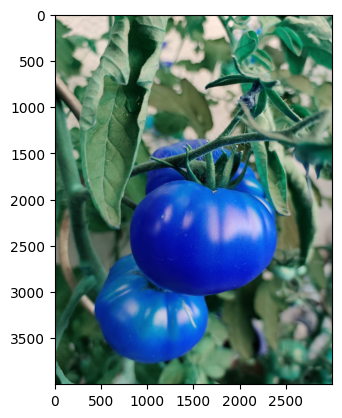

No such comm: a7c1f13368434851acd85f717f28bdf5


In [64]:
# Read image with OpenCV
image = cv.imread(image_path)
print(f"{image.shape=}\n{image.dtype=}\n{np.max(image)=}\n{np.min(image)=}")

plt.imshow(image)
plt.show()

image_new.shape=(4000, 3000, 3)
image_new.dtype=dtype('uint8')
np.max(image_new)=255
np.min(image_new)=0


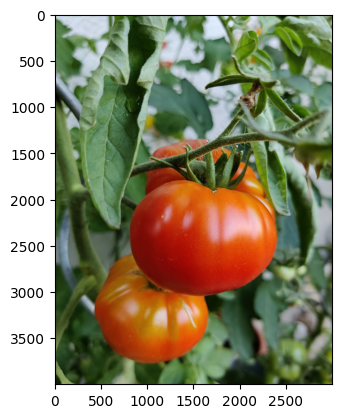

In [65]:
r = image[:, :, 0] #r
g = image[:, :, 1] #g
b = image[:, :, 2] #b

# concat r g b to one image 
image_new = np.dstack((b, g, r))
print(f"{image_new.shape=}\n{image_new.dtype=}\n{np.max(image_new)=}\n{np.min(image_new)=}")

plt.imshow(image_new)
plt.show()



The loaded image has a shape of 4000x3000 pixels and has 3 channels.
But the colors are not correctly loaded. Therefore it is important to always visualize images in order to prevent errors in consecutive processing steps.

#### <font color='blue'>Exercise:</font> 
What happened in this example? How can this problem be solved?

image_new.shape=(4000, 3000, 3)
image_new.dtype=dtype('uint8')
np.max(image_new)=255
np.min(image_new)=0


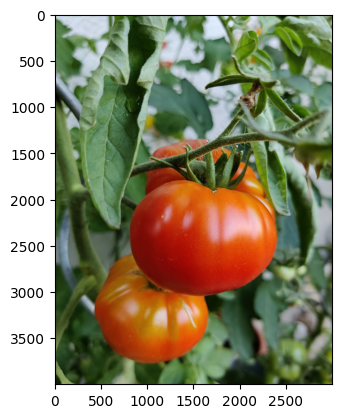

In [83]:
r = image[:, :, 0] #r
g = image[:, :, 1] #g
b = image[:, :, 2] #b

# concat r g b to one image 
image_new = np.dstack((b, g, r))
print(f"{image_new.shape=}\n{image_new.dtype=}\n{np.max(image_new)=}\n{np.min(image_new)=}")

plt.imshow(image_new)
plt.show()

image = image_new

## Color Channels

A digital color image typically consists of three channels - as can be seen by the shape of the image data structure. The usual way is to encode the colors are to use RGB (**R**ed, **G**reen, and **B**lue) channels. That is, the final rendered pixel of an image is a mix of the three colors red-green-blue. 

![Color_Channels](Images/color_channels.png)

Let's have a look at these RGB color channels in the respective colors and in grayscale. 


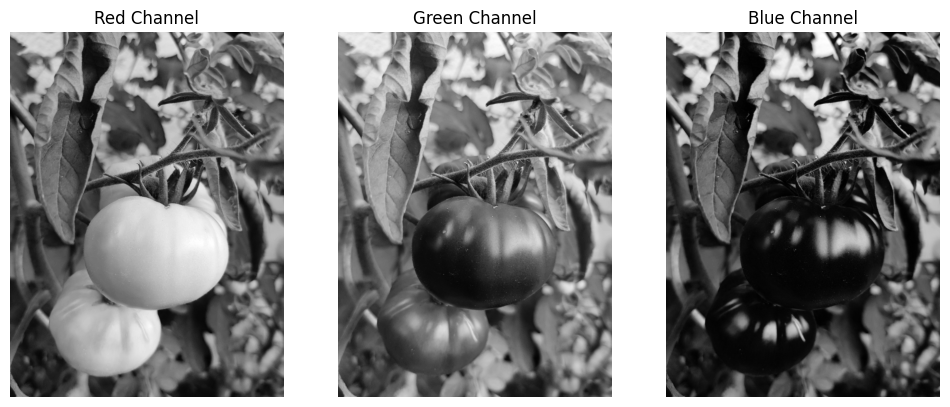

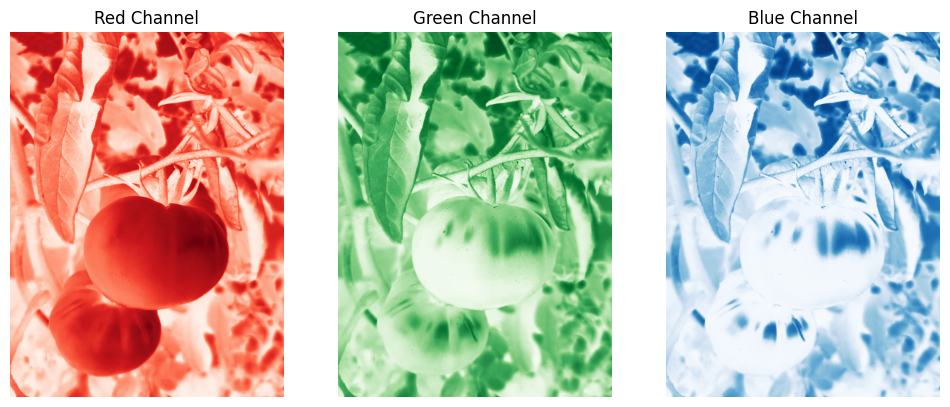

In [84]:
red_channel_image = image[:,:,0]
green_channel_image = image[:,:,1]
blue_channel_image = image[:,:,2]
fig, rows = plt.subplots(nrows=1, ncols=3, figsize=(12,14))
rows[0].imshow(red_channel_image, cmap='gray')
rows[0].axis('off')
rows[0].set_title('Red Channel')
rows[1].imshow(green_channel_image, cmap='gray')
rows[1].axis('off')
rows[1].set_title('Green Channel')
rows[2].imshow(blue_channel_image, cmap='gray')
rows[2].axis('off')
rows[2].set_title('Blue Channel')
plt.show()

fig, rows = plt.subplots(nrows=1, ncols=3, figsize=(12,14))
rows[0].imshow(red_channel_image, cmap='Reds')
rows[0].axis('off')
rows[0].set_title('Red Channel')
rows[1].imshow(green_channel_image, cmap='Greens')
rows[1].axis('off')
rows[1].set_title('Green Channel')
rows[2].imshow(blue_channel_image, cmap='Blues')
rows[2].axis('off')
rows[2].set_title('Blue Channel')
plt.show()

#### <font color='blue'>Exercise:</font> 
What can we see in each of these plots? Can we say something about the original image only by looking at grayscale images? What about the color-channel images? What is the range of values in each image?

In [85]:
# make statistical analysis
print(f"{red_channel_image.mean()=}")
print(f"{red_channel_image.std()=}")
print(f"{red_channel_image.var()=}")
print(f"{red_channel_image.max()=}")
print(f"{red_channel_image.min()=}")

# create a function for statistical summary
def get_statistical(image_array):
    print(f"Mean: {image_array.mean()}")
    print(f"Standard Deviation: {image_array.std()}")
    print(f"Variance: {image_array.var()}")
    print(f"Maximum: {image_array.max()}")
    print(f"Minimum: {image_array.min()}")
    print(f"Median: {np.median(image_array)}")
    print(f"25th percentile: {np.percentile(image_array, 25)}")
    print(f"75th percentile: {np.percentile(image_array, 75)}")

for image_np in [red_channel_image, green_channel_image, blue_channel_image]:
    get_statistical(image_np)
    print()



red_channel_image.mean()=114.19140608333333
red_channel_image.std()=61.060649395727275
red_channel_image.var()=3728.4029046279293
red_channel_image.max()=255
red_channel_image.min()=0
Mean: 114.19140608333333
Standard Deviation: 61.060649395727275
Variance: 3728.4029046279293
Maximum: 255
Minimum: 0
Median: 108.0
25th percentile: 64.0
75th percentile: 163.0

Mean: 108.45861583333334
Standard Deviation: 52.39007518939778
Variance: 2744.719978350752
Maximum: 241
Minimum: 0
Median: 108.0
25th percentile: 67.0
75th percentile: 147.0

Mean: 72.4113755
Standard Deviation: 63.07318125292769
Variance: 3978.226193364669
Maximum: 255
Minimum: 0
Median: 57.0
25th percentile: 15.0
75th percentile: 113.0



## Color Mixing
To illustrate the mixing of the RGB colors, play with the color sliders below. Each color channel has an intensity range of 8bit with pixel values from 0 to 255.

#### <font color='blue'>Exercise:</font>  
In this colorpicker a color based on the three color channels can be mixed. Try it out and try to generate colors as for example yellow, light green, violet, orange, and light grey.

In [86]:
# Function to update the color and display the image
def update_color(red=128, green=128, blue=128):
    color = (red / 255, green / 255, blue / 255)
    color_image = np.full((200, 200, 3), color)
    plt.imshow(color_image)
    plt.axis('off')
    plt.show()

_ = interact(update_color, red=(0, 255), green=(0, 255), blue=(0, 255))

interactive(children=(IntSlider(value=128, description='red', max=255), IntSlider(value=128, description='gree…

# Color Spaces

So far the image we were looking at was in the RGB color space. 

#### <font color='blue'>Exercise:</font> 
What other color spaces do you know?

## RGB to Grayscale

In this task, we want to change the color of our colored tomato image to grayscale.

#### <font color='blue'>Exercise:</font> 
How could that work?

For converting an RGB image to grayscale there exist different methods such as averaging the color channels.  <br>
However, the most successful and widely used method is the *Luminosity* method. This method takes a weighted sum of the color components.

$$Y = Lum(R,G,B) = w_R * R + w_G * G + w_B * B$$ 

For this there are two different pairs of weights:
$$w_R = 0.299, w_G = 0.587, w_B = 0.114$$
$$w_R = 0.2126, w_G = 0.7152, w_B = 0.0722$$

For the digital area the second triplet of values is recommended. Therefore we will use them as default values in our setting:

#### <font color='blue'>Exercise: </font> 
Implement the method ```rgb_to_grayscale```.

In [87]:
def rgb_to_grayscale(image: np.ndarray, wr: int = 0.2126, wg: int = 0.7152, wb: int = 0.0722) -> np.ndarray:
    ### BEGIN SOLUTION
    return wr * image[:,:,0] + wg * image[:,:,1] + wb * image[:,:,2]
    ### END SOLUTION

grayscale_image1.shape=(4000, 3000)
grayscale_image2.shape=(4000, 3000)


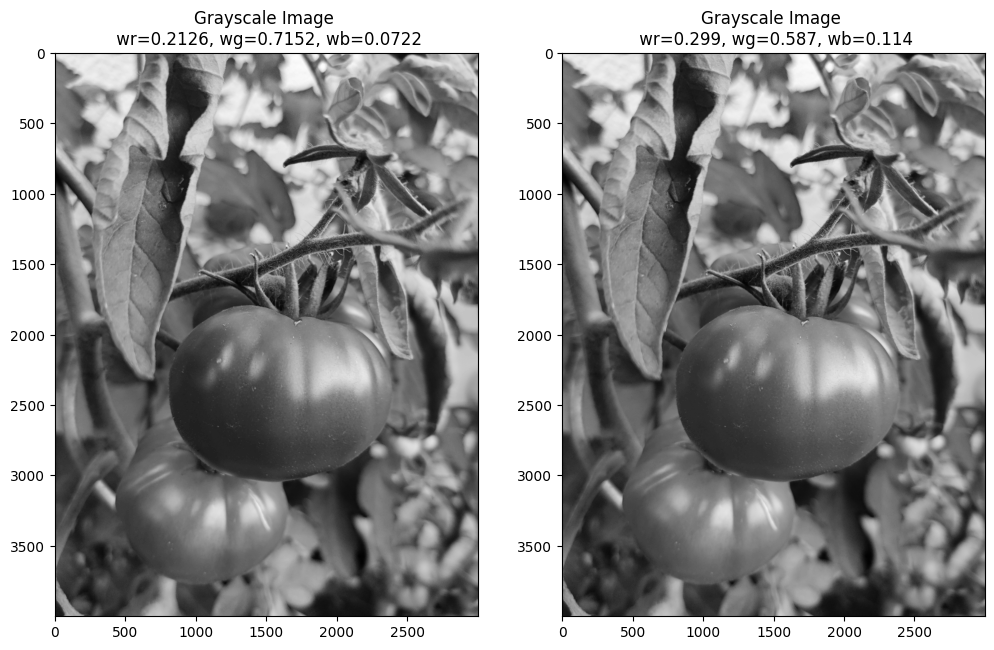

In [88]:
grayscale_image1 = rgb_to_grayscale(image)
grayscale_image2 = rgb_to_grayscale(image, wr=0.299, wg=0.587, wb=0.114)

print(f"{grayscale_image1.shape=}")
print(f"{grayscale_image2.shape=}")

fig, rows = plt.subplots(nrows=1, ncols=2, figsize=(12,14))
rows[0].imshow(grayscale_image1, cmap='gray')
rows[1].imshow(grayscale_image2, cmap='gray')
rows[0].set_title("Grayscale Image \n wr=0.2126, wg=0.7152, wb=0.0722")
rows[1].set_title("Grayscale Image \n wr=0.299, wg=0.587, wb=0.114")
plt.show()

# Histogram

Histograms visualize the frequency (distribution) of intensity values of the pixels in the image. 
The histograms can be calculated for color channels or on grayscale images.

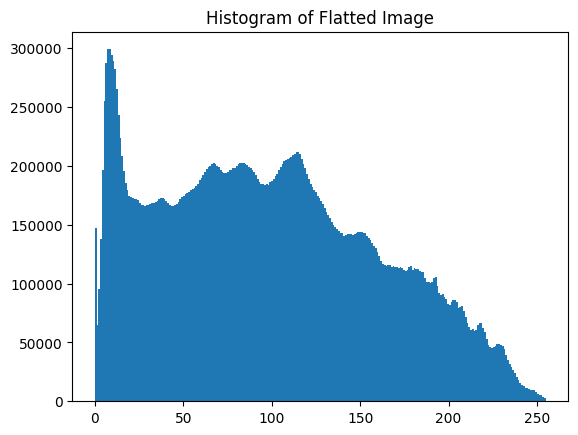

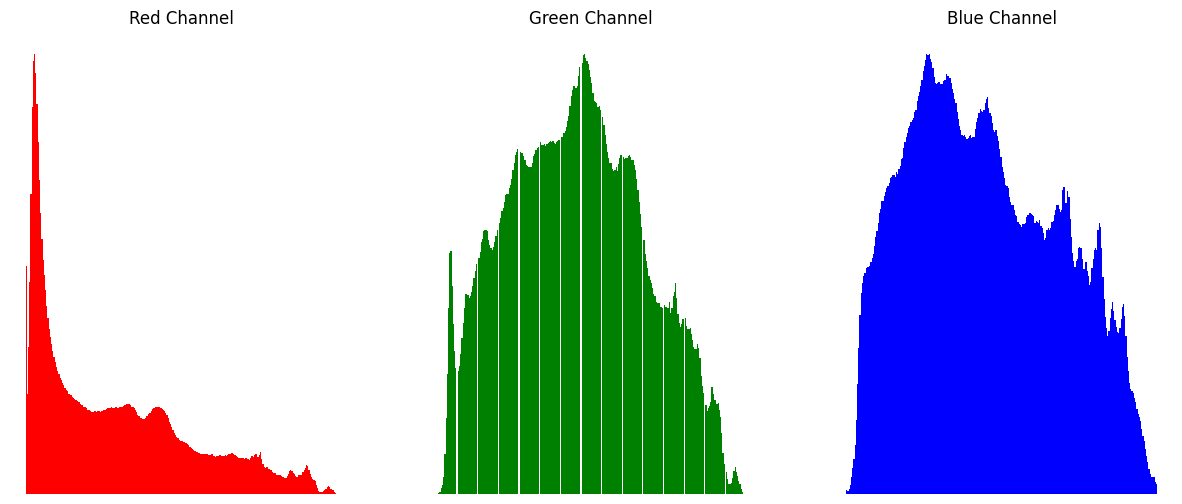

In [73]:
plt.hist(image.flatten(), bins=256)
plt.title("Histogram of Flatted Image")
plt.show()

fig, rows = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
rows[0].hist(red_channel_image.flatten(), bins=256, color='red')
rows[0].axis('off')
rows[0].set_title('Red Channel')
rows[1].hist(green_channel_image.flatten(), bins=256, color='green')
rows[1].axis('off')
rows[1].set_title('Green Channel')
rows[2].hist(blue_channel_image.flatten(), bins=256, color='blue')
rows[2].axis('off')
rows[2].set_title('Blue Channel')
plt.show()


#### <font color='blue'>Exercise:</font> 
* How many entries are in this histogram and which value range they belong to?
* What information can we gather from a histogram?
* Can we see in the histogram that there was a tomato in the image? Why?


#### <font color='blue'>Exercise:</font> 
Plot the histogram for the grayscale image

In [ ]:
# Plot histogram of grayscale image
### BEGIN SOLUTION
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)




### END SOLUTION

In [ ]:
grayscale_image = rgb_to_grayscale(image)
plt.hist(grayscale_image.flatten(), bins=256)
plt.title("Histogram of Grayscale Image")
plt.show()

# Pixel Operation

## Automatic Contrast Adjustment
Many images do not cover the full intensity range of possible pixel values. When we strech the intensity range of an image to the full range, we can for example improve the contrast in an image. <br>
For this we will shift the lowest and the highest intensity values to the end of the value ranges and adjust the pixels inbetween linearly. 

$$f_{a} = a_{min} + (a - a_{low}) * \frac{a_{max} - a_{min}}{a_{high} - a_{low}}$$

where $a_{min}$ and $a_{max}$ are the minimum and maximum of the intensity range of the image.

The contrast adjustment is demonstrated with a dark image. For simplicity we work on a grayscale image.

In [89]:
image = cv.imread('Images/dark_image.jpg') # Source: https://hintergrundbild.org/dunkle-hintergrundbilder
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
grayscale_image = rgb_to_grayscale(image)

In [111]:
def plot_img_with_hist(img, cmap='gray', bins=255, xlim_min=0, xlim_max=255):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    axs[0].imshow(img, cmap=cmap)
    axs[0].axis('off')
    axs[0].set_title("Image")
    axs[1].hist(img.flatten(), bins=bins)
    axs[1].set_xlim(xlim_min,xlim_max)
    axs[1].set_title("Histogram")
    # change log scale 
    axs[1].set_yscale('log')
    plt.tight_layout()
    plt.show()

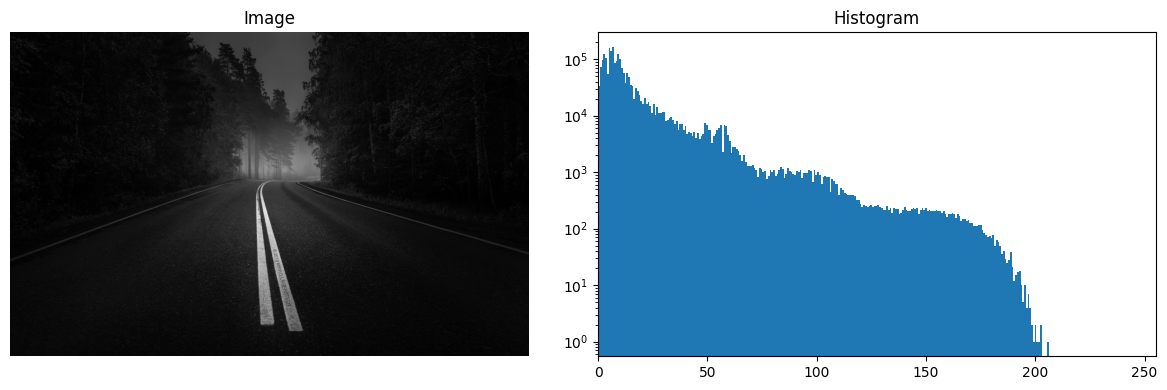

In [99]:
plot_img_with_hist(grayscale_image)

And apply the automatic contrast adjustment:

In [100]:
def automatic_contrast_adjustment(image:np.array, min=0, max=255) -> np.array:
    res = min + (image - np.min(image)) * (max - min)/(np.max(image)- np.min(image))
    return res.astype(int)

In [101]:
contrast_adj = automatic_contrast_adjustment(grayscale_image)

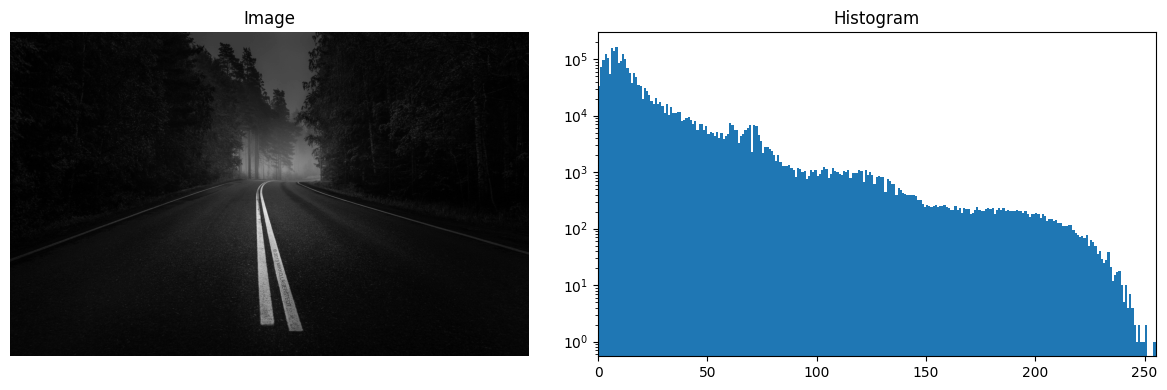

In [102]:
plot_img_with_hist(contrast_adj)

#### <font color='blue'>Exercise:</font> 
* Are visual adjustments noticeable?
* Has the histogram changed?
* Are you satisfied with the result?

## Linear Histogram Equalization

With the linear histogram equalization the intensity values of the pixels will be ajusted in the way, that the histogram of the image is uniformly distributed over the whole range of intensity values. First, the histogram is calculated, then the cumulative histogram will be generated, and in the end, based on this cumulative histogram the image will be equalized.

In [107]:
def linear_hist_equ(image:np.array) -> np.array:
    res = np.zeros((image.shape[0], image.shape[1]))
    H = np.histogram(image, bins=256)[0]

    # Compute cumulative histogram
    H = np.cumsum(H)
    
    # Equalize the image
    for v in range(image.shape[1]):
        for u in range(image.shape[0]):
            a: int = int(image[u, v])
            b: int = H[a] * 255 / (image.shape[0] * image.shape[1])
            res[u, v] = b
    return res
            

In [108]:
equalized = linear_hist_equ(grayscale_image)

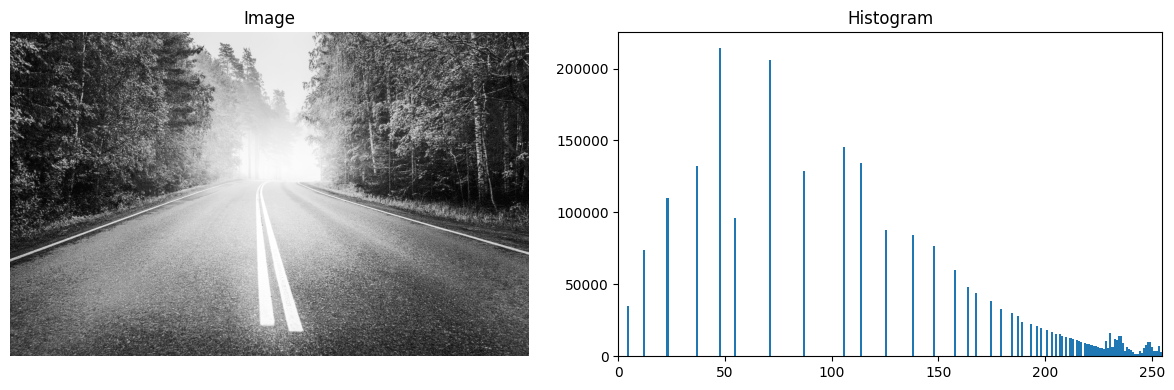

In [109]:
plot_img_with_hist(equalized)

#### <font color='blue'>Exercise:</font> 
* Are visual adjustments noticeable?
* How has the histogram changed?
* Are you satisfied with the result?

## Compare the Different Images

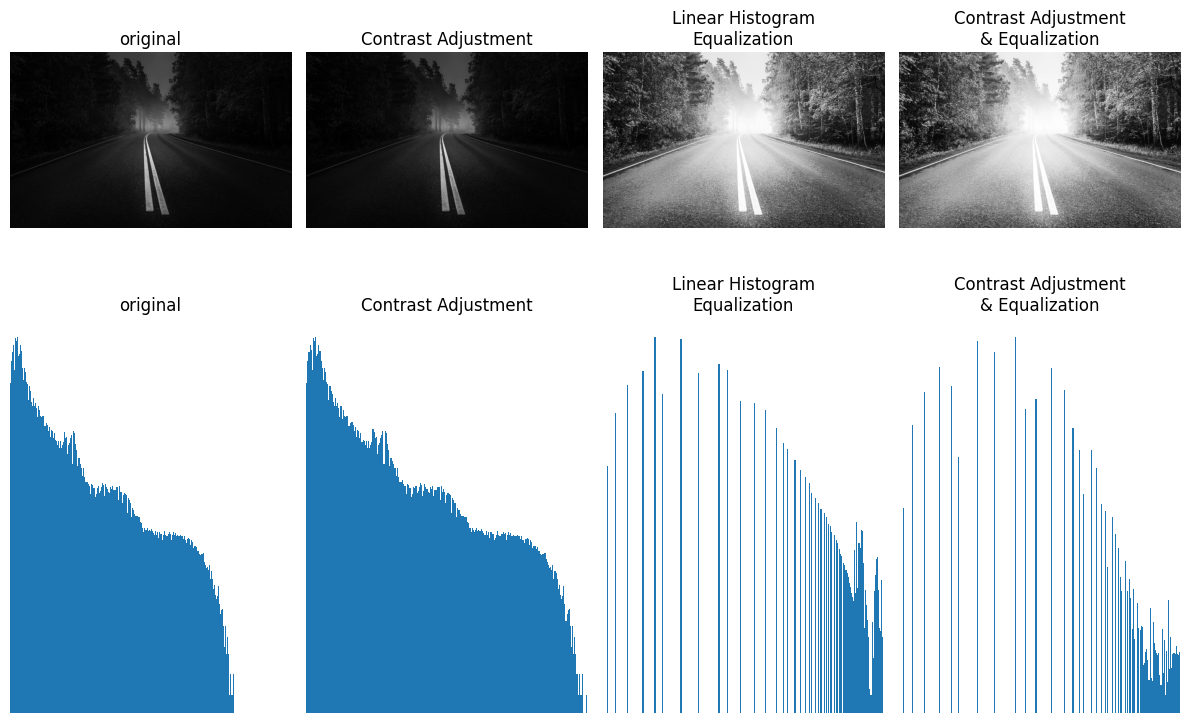

In [113]:
contrast_equalized = linear_hist_equ(contrast_adj)
images = [[grayscale_image, 'original'], [contrast_adj, 'Contrast Adjustment'], [equalized, 'Linear Histogram\nEqualization'], [contrast_equalized, 'Contrast Adjustment\n& Equalization']]
fig, axs = plt.subplots(nrows=2, ncols=len(images), figsize=(12,8))

for idx, img in enumerate(images):
    axs[0][idx].imshow(img[0], cmap='gray')
    axs[0][idx].axis('off')
    axs[0][idx].set_title(img[1])

    axs[1][idx].hist(img[0].flatten(), bins=255)
    axs[1][idx].axis('off')
    axs[1][idx].set_xlim(0, 255)
    axs[1][idx].set_title(img[1])
    axs[1][idx].set_yscale('log')
plt.tight_layout()
plt.show()

#### <font color='blue'>Exercise:</font> 
Which of those methods changes the histogram? Why and how?


## Normalization and Standardization
Normalization and standardization of images are key preprocessing techniques in image recognition and computer vision. 

*Normalization* generally scales the pixel intensities of an image to fit within a specific range, usually between 0 and 1. 
This ensures consistency in the scale of pixel intensities, which is crucial for machine learning and neural networks. 

*Standardization*, on the other hand, adjusts the pixel intensities considering the mean and standard deviation to achieve a *standardized* distribution, which helps minimize the impact of lighting conditions and other factors that could interfere with image classification and analysis.

In summary, normalizing and standardizing images enhances the consistency and quality of image data, enabling algorithms to derive more accurate and reliable insights.

In [114]:
def normalize(image):
    return image/255

In [115]:
def standardize(image):
    mean = np.mean(image)
    std = np.std(image)
    return (image - mean)/std

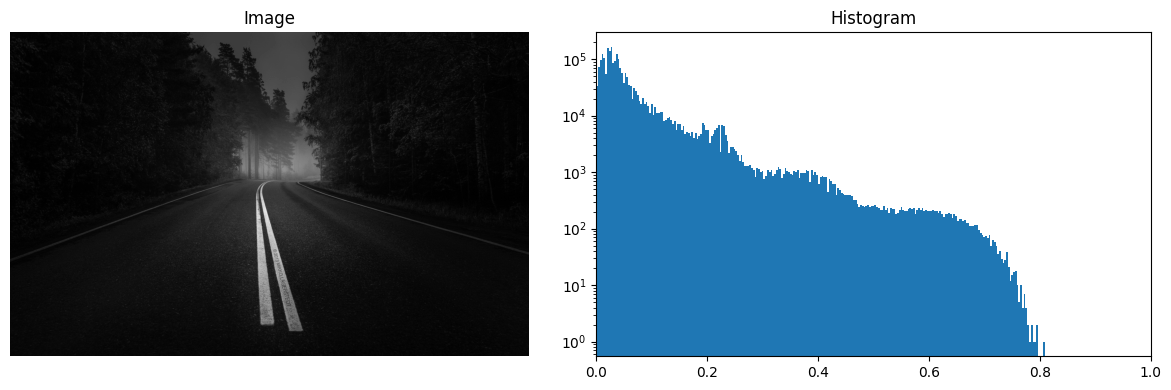

In [116]:
norm = normalize(grayscale_image)

plot_img_with_hist(norm, xlim_min=0, xlim_max=1)

(1200, 1920)


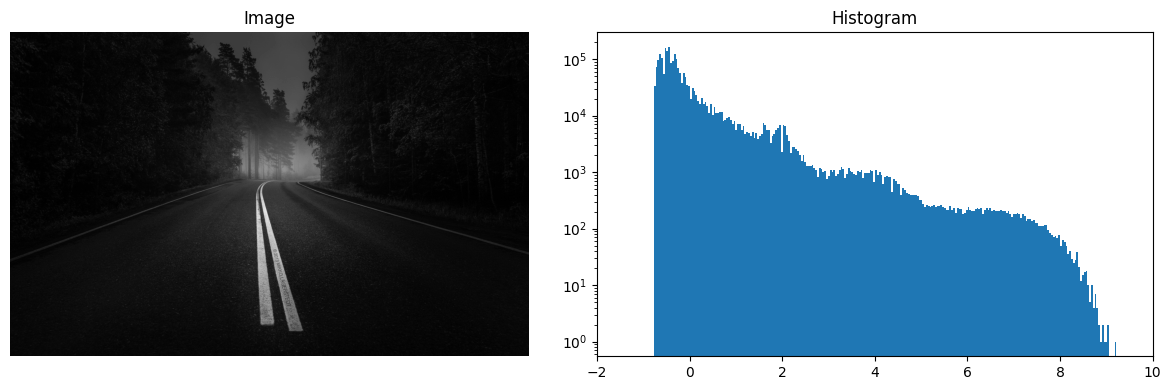

In [117]:
std_img = standardize(grayscale_image)

print(std_img.shape)
plot_img_with_hist(std_img, xlim_min=-2, xlim_max=10)

#### <font color='blue'>Exercise:</font> 
By applying the normalization and the standardisation of the values the image and the histogram changes.
How are they changed? What happens to the histograms? What happens to the image?
